## Ánalisis para la presentación del caso Titanic

Notebook con las gráficas a emplear en la presentación con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

In [54]:
#Importamos los paquetes y módulos que necesitamos a lo largo del notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from bootcampviztools import *
from scipy.stats import chi2_contingency, mannwhitneyu


Cargamos en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [55]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Nos deshacemos de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [56]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace= True)

In [57]:
# Descripción del dataframe con info comprobando la operación
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


Sumamos las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, en otra columna "family_members" y eliminamos de "parch" y "sibsp"

In [58]:
df_titanic["family_members"] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic = df_titanic.drop(["parch","sibsp"], axis = 1)

Imputamos la moda a los valores nulos de "embark_town" que son 3.

In [59]:
df_titanic.loc[df_titanic['embark_town'].isna(), "embark_town"] = df_titanic['embark_town'].mode()[0]

In [60]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


Imputamos la media a los valores faltantes de "age", considerando la columna "who")

In [61]:
df_titanic['age_who']=df_titanic.groupby('who')['age'].transform("mean")
df_titanic.head(20)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_who
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,33.173123
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,32.000000
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,32.000000
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,32.000000
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,33.173123
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0,33.173123
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0,33.173123
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4,6.369518
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2,32.000000
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1,6.369518


In [62]:
#Este código está asignando las edades promedio calculadas previamente a las filas donde la edad ('age') es nula (NaN) en el DataFrame df_titanic.
df_titanic.loc[df_titanic['age'].isna(),"age"]=df_titanic.loc[df_titanic['age'].isna(),"age_who"]

In [63]:
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
 10  age_who         891 non-null    float64
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 64.5+ KB
None


In [64]:
#Eliminamos la columna con las edades promedio age_who
df_titanic.drop("age_who",axis=1,inplace=True)


Nota: utilizamos la variable "alive" para saber si un pasajero sobrevivió o no:

1- ¿El titanic fue un accidente con una tasa de mortalidad alta?


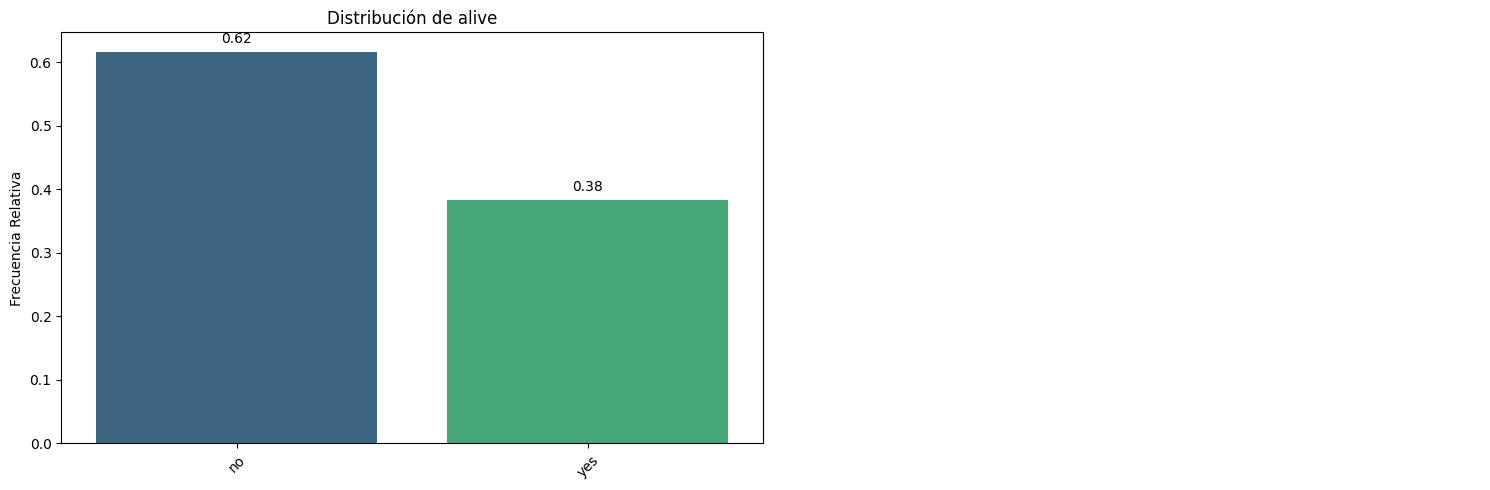

In [65]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

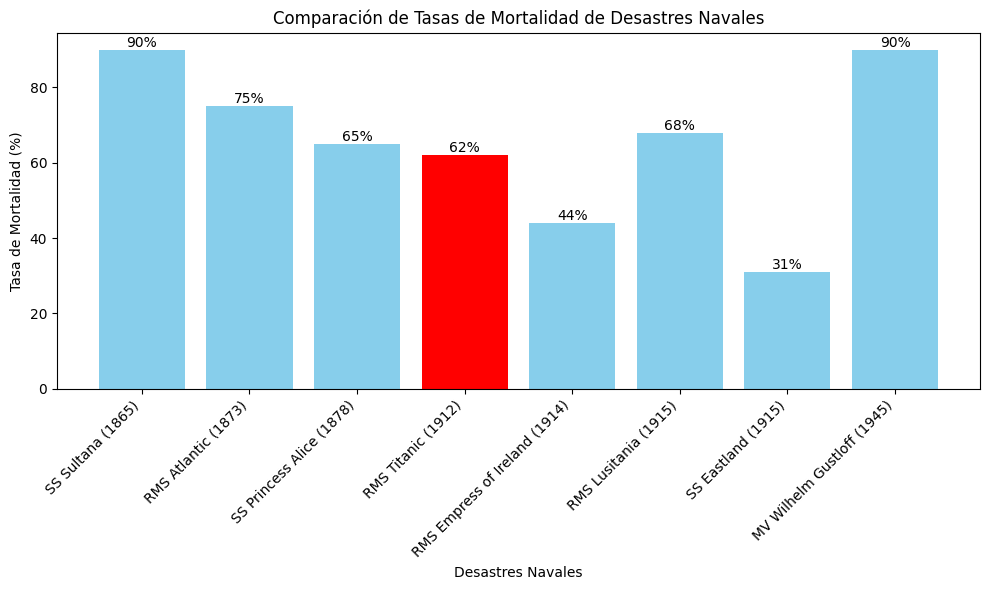

In [66]:


# Datos de los desastres navales
desastres = ['SS Sultana (1865)','RMS Atlantic (1873)','SS Princess Alice (1878)','RMS Titanic (1912)', 'RMS Empress of Ireland (1914)', 'RMS Lusitania (1915)', 'SS Eastland (1915)', 'MV Wilhelm Gustloff (1945)']
tasas_mortalidad = [90, 75, 65,62, 44, 68, 31, 90]  # Tasas de mortalidad en porcentaje

# Colores para cada barra
colores = ['skyblue' if 'Titanic' not in nombre else 'red' for nombre in desastres]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(desastres, tasas_mortalidad, color=colores)

# Añadir etiquetas de tasa de mortalidad en cada barra
for bar, tasa in zip(bars, tasas_mortalidad):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{tasa}%', ha='center', va='bottom', fontsize=10, color='black')

# Añadir etiquetas y título
plt.xlabel('Desastres Navales')
plt.ylabel('Tasa de Mortalidad (%)')
plt.title('Comparación de Tasas de Mortalidad de Desastres Navales')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar solapamiento
plt.show()


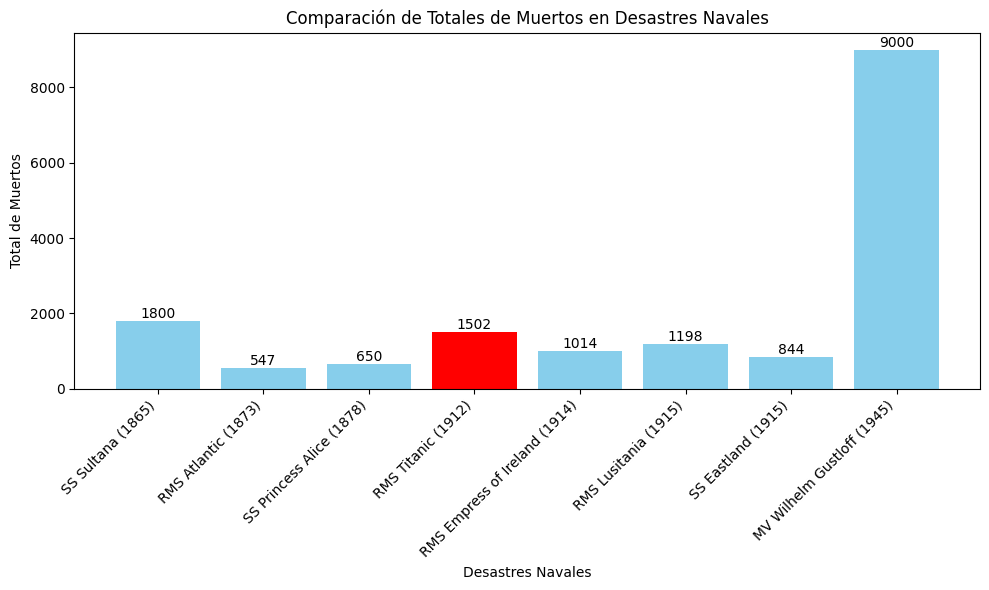

In [67]:


# Datos de los desastres navales
desastres = ['SS Sultana (1865)','RMS Atlantic (1873)','SS Princess Alice (1878)','RMS Titanic (1912)', 'RMS Empress of Ireland (1914)', 'RMS Lusitania (1915)', 'SS Eastland (1915)', 'MV Wilhelm Gustloff (1945)']
totales_muertos = [1800, 547, 650, 1502, 1014, 1198, 844, 9000]  # Total de muertos en cada desastre naval

# Colores para cada barra
colores = ['skyblue' if 'Titanic' not in nombre else 'red' for nombre in desastres]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(desastres, totales_muertos, color=colores)

# Añadir etiquetas de total de muertos en cada barra
for bar, total_muertos in zip(bars, totales_muertos):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{total_muertos}', ha='center', va='bottom', fontsize=10, color='black')

# Añadir etiquetas y título
plt.xlabel('Desastres Navales')
plt.ylabel('Total de Muertos')
plt.title('Comparación de Totales de Muertos en Desastres Navales')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar solapamiento
plt.show()


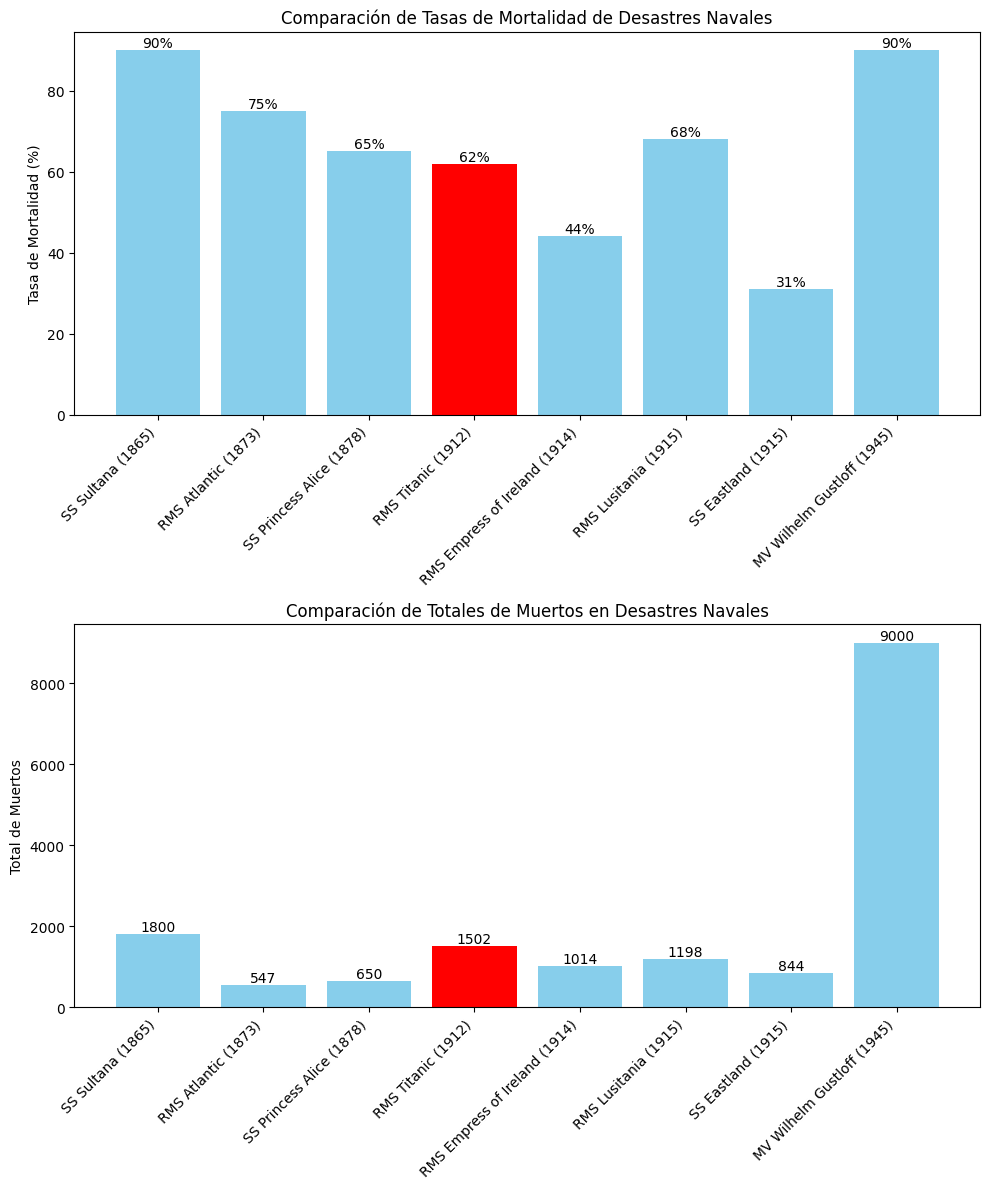

In [68]:


# Datos de los desastres navales
desastres = ['SS Sultana (1865)', 'RMS Atlantic (1873)', 'SS Princess Alice (1878)', 'RMS Titanic (1912)', 'RMS Empress of Ireland (1914)', 'RMS Lusitania (1915)', 'SS Eastland (1915)', 'MV Wilhelm Gustloff (1945)']
tasas_mortalidad = [90, 75, 65, 62, 44, 68, 31, 90]  # Tasas de mortalidad en porcentaje
totales_muertos = [1800, 547, 650, 1502, 1014, 1198, 844, 9000]  # Total de muertos en cada desastre naval

# Colores para cada barra
colores = ['skyblue' if 'Titanic' not in nombre else 'red' for nombre in desastres]

# Crear la figura y los ejes (subplots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico de barras para tasas de mortalidad
bars1 = ax1.bar(desastres, tasas_mortalidad, color=colores)
ax1.set_ylabel('Tasa de Mortalidad (%)')
ax1.set_title('Comparación de Tasas de Mortalidad de Desastres Navales')

# Añadir etiquetas de tasa de mortalidad en cada barra
for bar, tasa in zip(bars1, tasas_mortalidad):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{tasa}%', ha='center', va='bottom', fontsize=10, color='black')

# Gráfico de barras para totales de muertos
bars2 = ax2.bar(desastres, totales_muertos, color=colores)
ax2.set_ylabel('Total de Muertos')
ax2.set_title('Comparación de Totales de Muertos en Desastres Navales')

# Añadir etiquetas de total de muertos en cada barra
for bar, total_muertos in zip(bars2, totales_muertos):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{total_muertos}', ha='center', va='bottom', fontsize=10, color='black')

# Rotar etiquetas del eje x para mayor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Ajustar diseño para evitar solapamiento
plt.tight_layout()

# Mostrar los gráficos
plt.show()


2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    

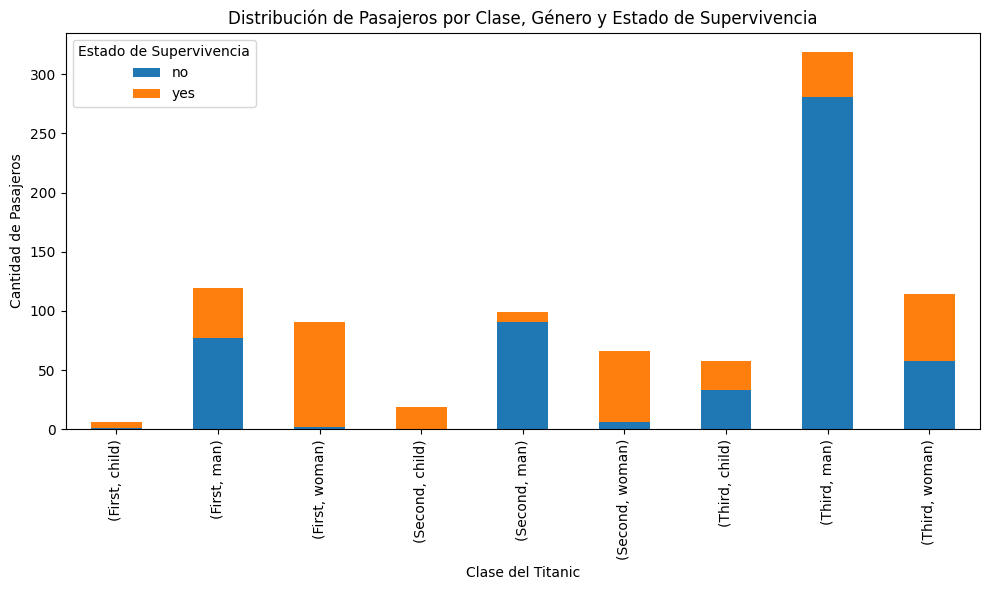

In [69]:


# Agrupar los datos por clase, género, edad y estado de supervivencia, y contar la cantidad de pasajeros en cada categoría
grouped_data = df_titanic.groupby(['class', 'who', 'alive'])['alive'].count().unstack()

# Crear el gráfico de barras apiladas
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Clase del Titanic')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Distribución de Pasajeros por Clase, Género y Estado de Supervivencia')

# Mostrar el gráfico
plt.legend(title='Estado de Supervivencia')
plt.tight_layout()
plt.show()


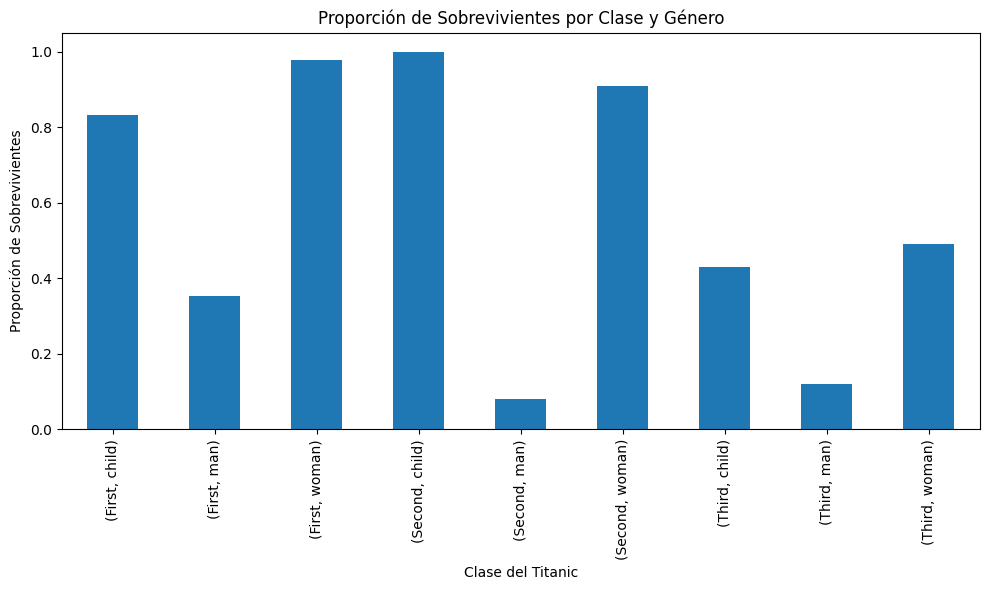

In [70]:


# Agrupar los datos por clase, género y estado de supervivencia, y calcular la proporción de sobrevivientes en cada categoría
grouped_data = df_titanic.groupby(['class', 'who', 'alive'])['alive'].count().unstack()
survival_proportions = grouped_data['yes'] / grouped_data.sum(axis=1)  # Calculamos la proporción de sobrevivientes

# Crear el gráfico de barras apiladas
survival_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Clase del Titanic')
plt.ylabel('Proporción de Sobrevivientes')
plt.title('Proporción de Sobrevivientes por Clase y Género')

# Mostrar el gráfico

plt.tight_layout()
plt.show()


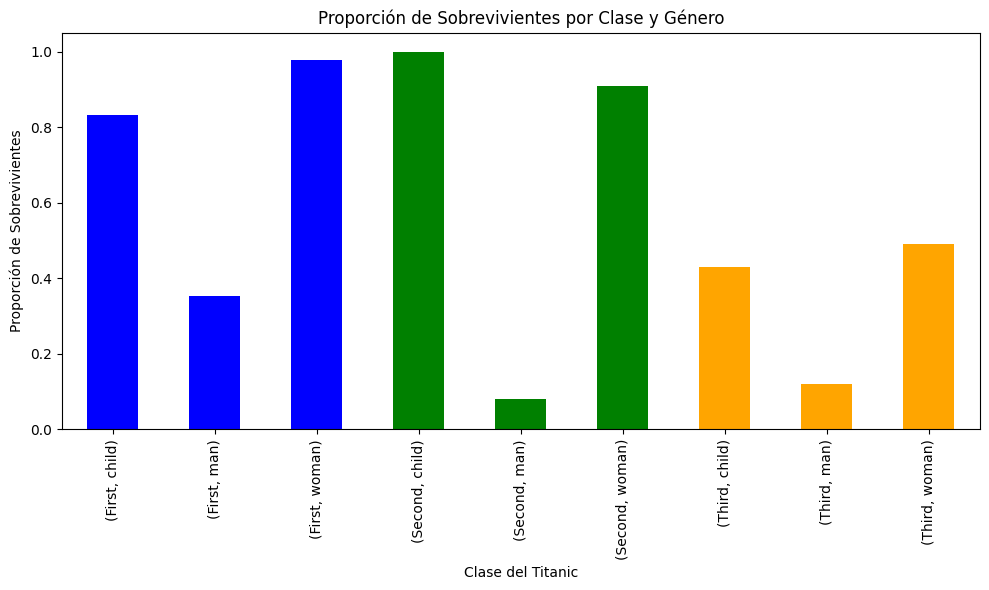

In [71]:


# Agrupar los datos por clase, género y estado de supervivencia, y calcular la proporción de sobrevivientes en cada categoría
grouped_data = df_titanic.groupby(['class', 'who', 'alive'])['alive'].count().unstack()
survival_proportions = grouped_data['yes'] / grouped_data.sum(axis=1)  # Calculamos la proporción de sobrevivientes

# Definir colores para cada clase del Titanic
colores = {'First': 'blue', 'Second': 'green', 'Third': 'orange'}

# Crear el gráfico de barras apiladas
ax = survival_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colores[x] for x in survival_proportions.index.get_level_values('class')])

# Añadir etiquetas y título
plt.xlabel('Clase del Titanic')
plt.ylabel('Proporción de Sobrevivientes')
plt.title('Proporción de Sobrevivientes por Clase y Género')

# Mostrar el gráfico

plt.tight_layout()
plt.show()


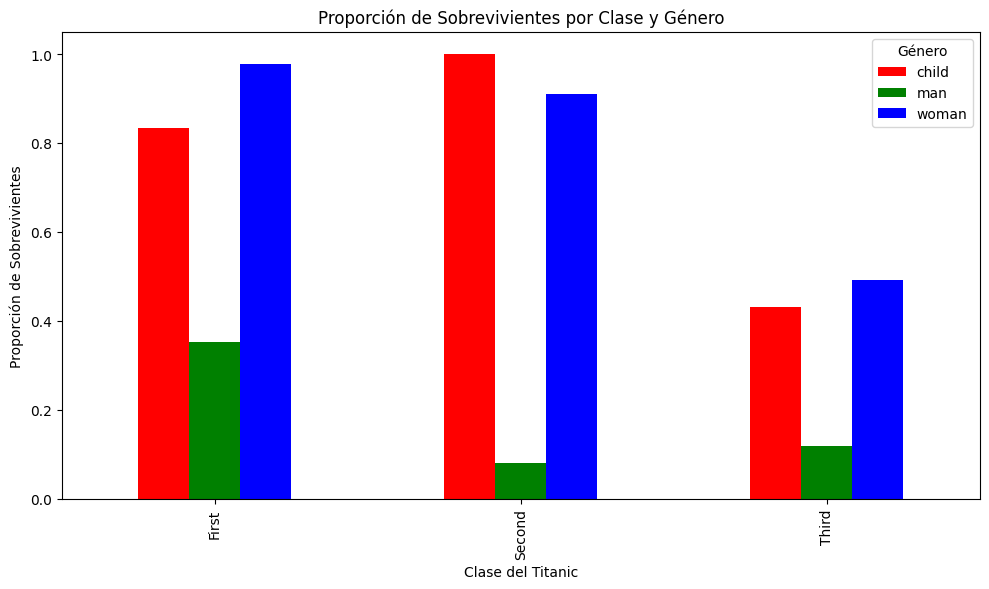

In [72]:


# Agrupar los datos por clase, género, who y estado de supervivencia, y calcular la proporción de sobrevivientes en cada categoría
grouped_data = df_titanic.groupby(['class', 'who', 'alive'])['alive'].count().unstack()
survival_proportions = grouped_data['yes'] / grouped_data.sum(axis=1)  # Calculamos la proporción de sobrevivientes

# Definir colores para cada clase del Titanic
colores = {'First': 'blue', 'Second': 'green', 'Third': 'orange'}

# Crear el gráfico de barras agrupadas
ax = survival_proportions.unstack('who').plot(kind='bar', figsize=(10, 6), color=['red', 'green', 'blue'])

# Añadir etiquetas y título
plt.xlabel('Clase del Titanic')
plt.ylabel('Proporción de Sobrevivientes')
plt.title('Proporción de Sobrevivientes por Clase y Género')

# Mostrar el gráfico
plt.legend(title='Género')
plt.tight_layout()
plt.show()


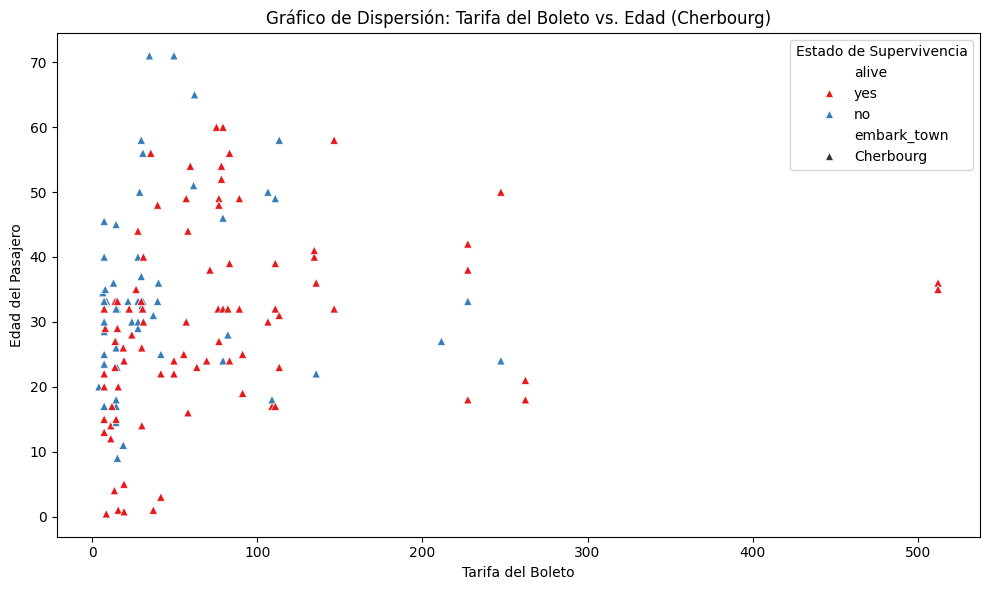

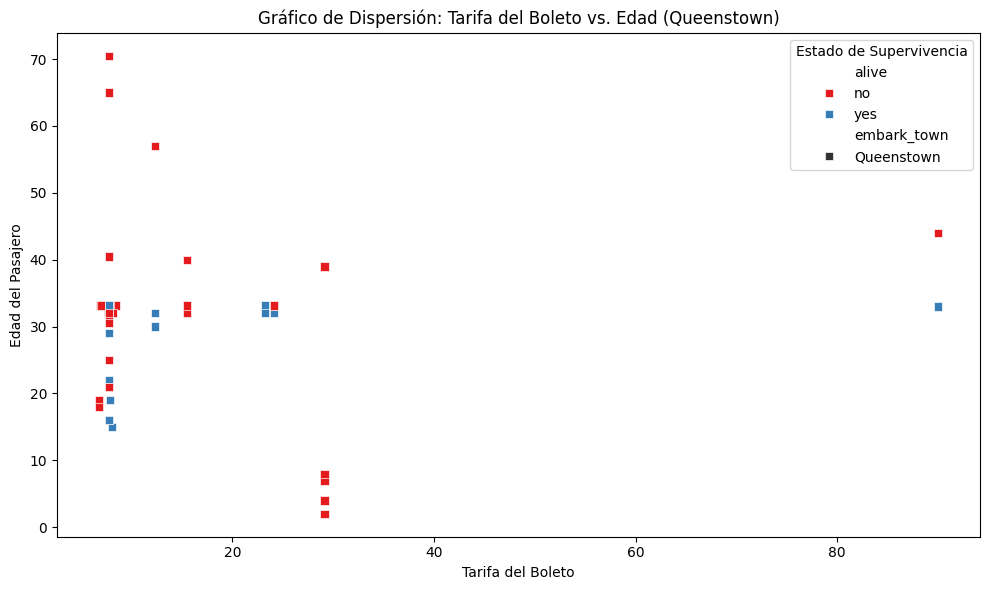

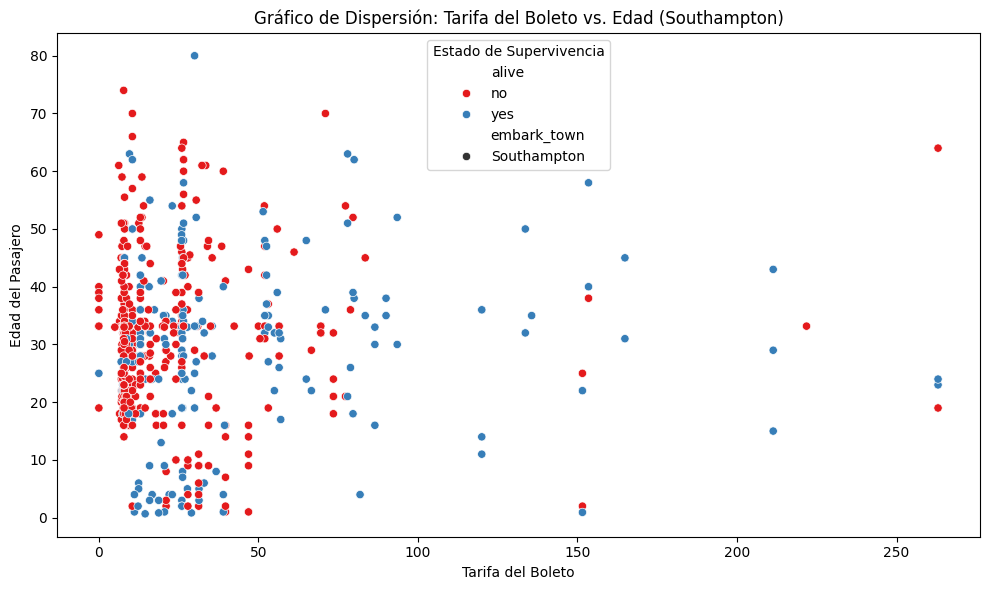

In [135]:
#Creemos un grafico de dispersión para cada puerto. Luego los veremos todos a la vez

# Filtrar el DataFrame por cada puerto de embarque
df_cherbourg = df_titanic[df_titanic['embark_town'] == 'Cherbourg']
df_queenstown = df_titanic[df_titanic['embark_town'] == 'Queenstown']
df_southampton = df_titanic[df_titanic['embark_town'] == 'Southampton']

# Crear el gráfico de dispersión para Cherbourg
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cherbourg, x='fare', y='age', hue='alive', style='embark_town', markers=['^'], palette='Set1')
plt.title('Gráfico de Dispersión: Tarifa del Boleto vs. Edad (Cherbourg)')
plt.xlabel('Tarifa del Boleto')
plt.ylabel('Edad del Pasajero')
plt.legend(title='Estado de Supervivencia')
plt.tight_layout()
plt.show()

# Crear el gráfico de dispersión para Queenstown
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_queenstown, x='fare', y='age', hue='alive', style='embark_town', markers=['s'], palette='Set1')
plt.title('Gráfico de Dispersión: Tarifa del Boleto vs. Edad (Queenstown)')
plt.xlabel('Tarifa del Boleto')
plt.ylabel('Edad del Pasajero')
plt.legend(title='Estado de Supervivencia')
plt.tight_layout()
plt.show()

# Crear el gráfico de dispersión para Southampton
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_southampton, x='fare', y='age', hue='alive', style='embark_town', markers=['o'], palette='Set1')
plt.title('Gráfico de Dispersión: Tarifa del Boleto vs. Edad (Southampton)')
plt.xlabel('Tarifa del Boleto')
plt.ylabel('Edad del Pasajero')
plt.legend(title='Estado de Supervivencia')
plt.tight_layout()
plt.show()


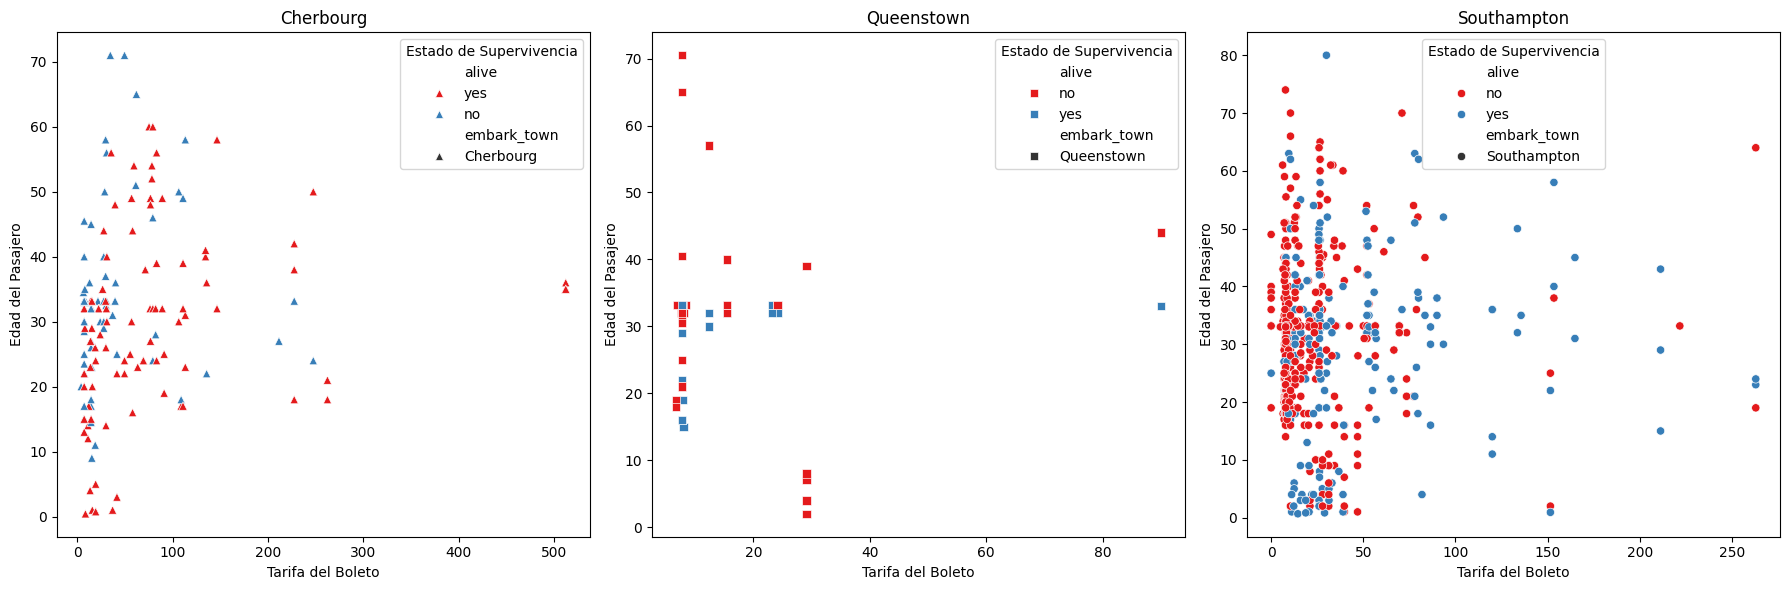

In [136]:

# Filtrar el DataFrame por cada puerto de embarque
df_cherbourg = df_titanic[df_titanic['embark_town'] == 'Cherbourg']
df_queenstown = df_titanic[df_titanic['embark_town'] == 'Queenstown']
df_southampton = df_titanic[df_titanic['embark_town'] == 'Southampton']

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Crear el gráfico de dispersión para Cherbourg
sns.scatterplot(data=df_cherbourg, x='fare', y='age', hue='alive', style='embark_town', markers=['^'], palette='Set1', ax=axes[0])
axes[0].set_title('Cherbourg')
axes[0].set_xlabel('Tarifa del Boleto')
axes[0].set_ylabel('Edad del Pasajero')
axes[0].legend(title='Estado de Supervivencia')

# Crear el gráfico de dispersión para Queenstown
sns.scatterplot(data=df_queenstown, x='fare', y='age', hue='alive', style='embark_town', markers=['s'], palette='Set1', ax=axes[1])
axes[1].set_title('Queenstown')
axes[1].set_xlabel('Tarifa del Boleto')
axes[1].set_ylabel('Edad del Pasajero')
axes[1].legend(title='Estado de Supervivencia')

# Crear el gráfico de dispersión para Southampton
sns.scatterplot(data=df_southampton, x='fare', y='age', hue='alive', style='embark_town', markers=['o'], palette='Set1', ax=axes[2])
axes[2].set_title('Southampton')
axes[2].set_xlabel('Tarifa del Boleto')
axes[2].set_ylabel('Edad del Pasajero')
axes[2].legend(title='Estado de Supervivencia')

plt.tight_layout()
plt.show()


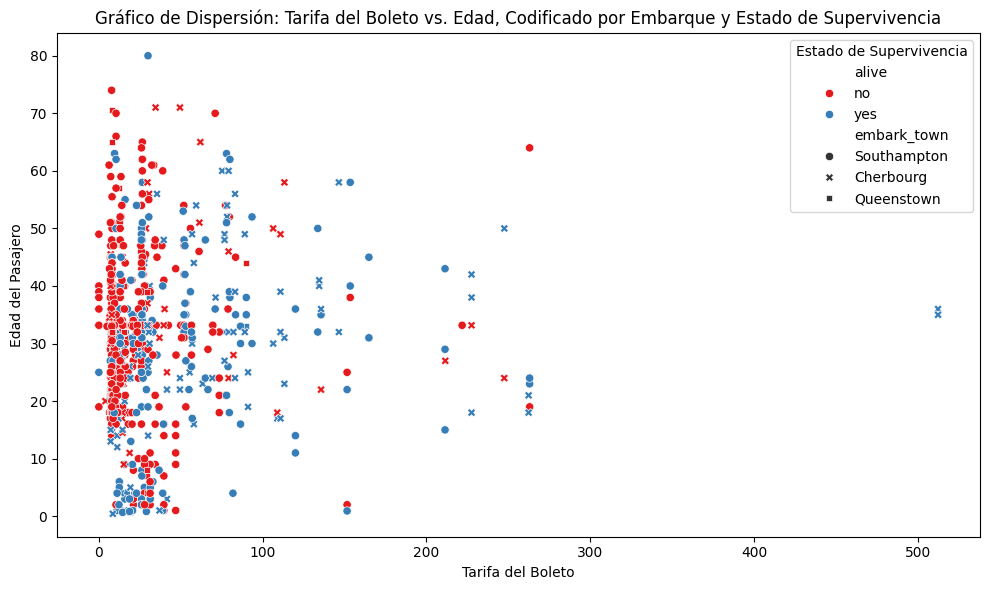

In [120]:

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_titanic, x='fare', y='age', hue='alive', style='embark_town', palette='Set1')

# Añadir etiquetas y título
plt.xlabel('Tarifa del Boleto')
plt.ylabel('Edad del Pasajero')
plt.title('Gráfico de Dispersión: Tarifa del Boleto vs. Edad, Codificado por Embarque y Estado de Supervivencia')

# Mostrar el gráfico
plt.legend(title='Estado de Supervivencia')
plt.tight_layout()
plt.show()


In [121]:
import pandas as pd
from scipy.stats import chi2_contingency


# Crear la tabla de contingencia
contingency_table = pd.crosstab(index=[df_titanic['embark_town'], df_titanic['who'], df_titanic['class']], columns=df_titanic['alive'])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir la tabla de contingencia y los resultados del test de chi-cuadrado
print("Tabla de Contingencia:")
print(contingency_table)
print("\nResultados del Test de Chi-cuadrado:")
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")


Tabla de Contingencia:
alive                      no  yes
embark_town who   class           
Cherbourg   child Second    0    3
                  Third     4   11
            man   First    25   17
                  Second    8    1
                  Third    31    8
            woman First     1   42
                  Second    0    5
                  Third     6    6
Queenstown  child Third     4    1
            man   First     1    0
                  Second    1    0
                  Third    32    3
            woman First     0    1
                  Second    0    2
                  Third     9   23
Southampton child First     1    5
                  Second    0   16
                  Third    25   13
            man   First    51   25
                  Second   82    7
                  Third   218   27
            woman First     1   46
                  Second    6   53
                  Third    43   27

Resultados del Test de Chi-cuadrado:
Estadístico Chi-cuadrado: 409

In [122]:

# Calcula la correlación entre 'fare' y 'alive' para cada grupo de 'embark_town', 'who' y 'class'
correlation_by_group = df_titanic.groupby(['embark_town', 'who', 'class']).apply(lambda x: np.corrcoef(x['fare'], x['alive'] == 'yes')[0, 1])

# Imprime la correlación para cada grupo
print("Correlación entre 'fare' y 'alive' por grupo:")
print(correlation_by_group)


Correlación entre 'fare' y 'alive' por grupo:
embark_town  who    class 
Cherbourg    child  Second         NaN
                    Third    -0.058285
             man    First     0.143204
                    Second   -0.360076
                    Third     0.355391
             woman  First     0.153232
                    Second         NaN
                    Third     0.112565
Queenstown   child  Third    -1.000000
             man    First          NaN
                    Second         NaN
                    Third     0.183726
             woman  First          NaN
                    Second         NaN
                    Third    -0.059218
Southampton  child  First    -0.136505
                    Second         NaN
                    Third    -0.567880
             man    First    -0.092765
                    Second   -0.084244
                    Third     0.143304
             woman  First    -0.145093
                    Second    0.088739
                    Third    -

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\ferna\AppData\Local\Temp\ipykernel_8540\3497655897.py:7

In [128]:


# Calcular las correlaciones para cada grupo definido por 'embark_town', 'who' y 'class'
correlation_by_group = df_titanic.groupby(['embark_town', 'who', 'class']).agg(correlation=('fare', lambda x: x.corr(df_titanic.loc[x.index, 'alive'] == 'yes')))

# Resetear el índice para obtener un DataFrame plano
df_correlation = correlation_by_group.reset_index()

# Imprimir el DataFrame df_correlation
print(df_correlation)




    embark_town    who   class  correlation
0     Cherbourg  child  Second          NaN
1     Cherbourg  child   Third    -0.058285
2     Cherbourg    man   First     0.143204
3     Cherbourg    man  Second    -0.360076
4     Cherbourg    man   Third     0.355391
5     Cherbourg  woman   First     0.153232
6     Cherbourg  woman  Second          NaN
7     Cherbourg  woman   Third     0.112565
8    Queenstown  child   Third    -1.000000
9    Queenstown    man   First          NaN
10   Queenstown    man  Second          NaN
11   Queenstown    man   Third     0.183726
12   Queenstown  woman   First          NaN
13   Queenstown  woman  Second          NaN
14   Queenstown  woman   Third    -0.059218
15  Southampton  child   First    -0.136505
16  Southampton  child  Second          NaN
17  Southampton  child   Third    -0.567880
18  Southampton    man   First    -0.092765
19  Southampton    man  Second    -0.084244
20  Southampton    man   Third     0.143304
21  Southampton  woman   First  

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


# Interpretación:

## Cherbourg:

Para los niños de tercera clase que embarcaron en Cherbourg, hay una ligera correlación negativa entre la tarifa del boleto y la probabilidad de sobrevivir. Esto sugiere que, en este grupo, las personas que pagaron tarifas más altas tenían una probabilidad ligeramente menor de sobrevivir.
Para los hombres de segunda y tercera clase que embarcaron en Cherbourg, hay una correlación positiva entre la tarifa del boleto y la probabilidad de sobrevivir. En otras palabras, los hombres que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir.
Para las mujeres de primera y tercera clase que embarcaron en Cherbourg, hay una correlación positiva entre la tarifa del boleto y la probabilidad de sobrevivir. Esto sugiere que, en estos grupos, las mujeres que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir.

## Queenstown:

Para los niños de tercera clase que embarcaron en Queenstown, hay una correlación negativa muy fuerte entre la tarifa del boleto y la probabilidad de sobrevivir. Esto indica que los niños que pagaron tarifas más altas tenían una probabilidad extremadamente baja de sobrevivir.
Para los hombres de tercera clase que embarcaron en Queenstown, hay una correlación positiva entre la tarifa del boleto y la probabilidad de sobrevivir. En este caso, los hombres que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir.
Para las mujeres de tercera clase que embarcaron en Queenstown, hay una correlación negativa entre la tarifa del boleto y la probabilidad de sobrevivir. Esto sugiere que, en este grupo, las mujeres que pagaron tarifas más altas tenían una probabilidad ligeramente menor de sobrevivir.

## Southampton:

Para los niños de primera y tercera clase que embarcaron en Southampton, hay una correlación negativa entre la tarifa del boleto y la probabilidad de sobrevivir. En estos grupos, los niños que pagaron tarifas más altas tenían una probabilidad ligeramente menor de sobrevivir.
Para los hombres de primera y segunda clase que embarcaron en Southampton, no hay una correlación clara entre la tarifa del boleto y la probabilidad de sobrevivir.
Para las mujeres de primera y tercera clase que embarcaron en Southampton, hay una correlación negativa entre la tarifa del boleto y la probabilidad de sobrevivir. Esto sugiere que, en estos grupos, las mujeres que pagaron tarifas más altas tenían una probabilidad ligeramente menor de sobrevivir.

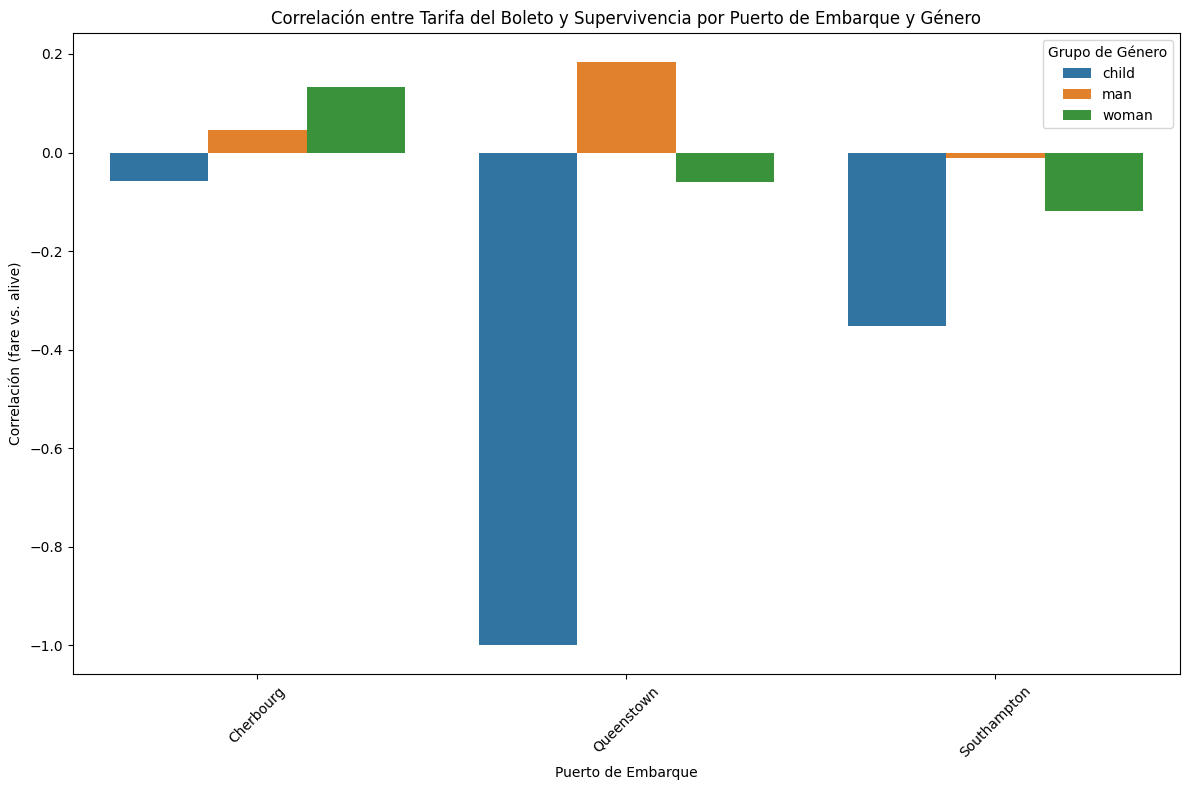

In [132]:
# Tratemos de ilustrarlo
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=df_correlation, x='embark_town', y='correlation', hue='who', errorbar=None)

# Añadir etiquetas y título
plt.xlabel('Puerto de Embarque')
plt.ylabel('Correlación (fare vs. alive)')
plt.title('Correlación entre Tarifa del Boleto y Supervivencia por Puerto de Embarque y Género')
plt.legend(title='Grupo de Género')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# El resto del notebook proviene del sprint 7. Se conserva aqui a modo de reflexión.

5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.



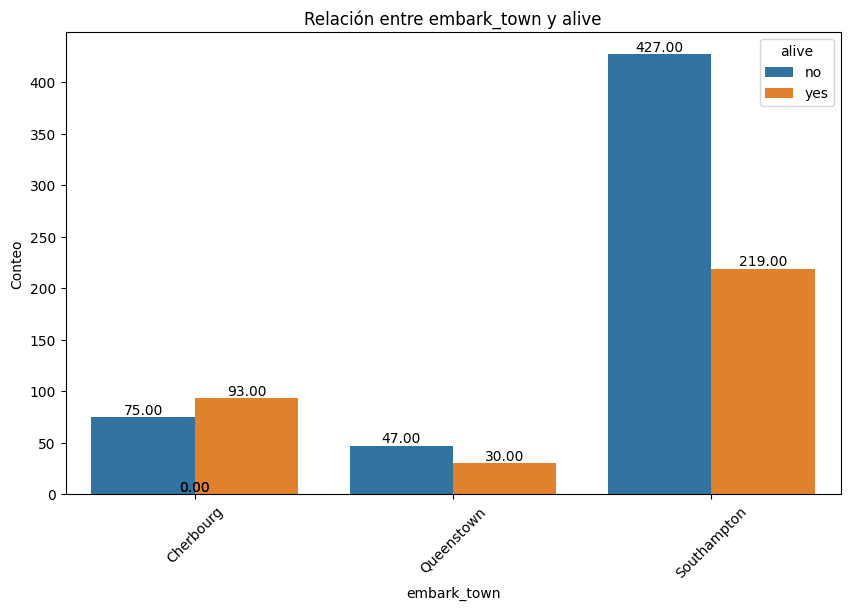

In [84]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

In [85]:
df_titanic.groupby('embark_town',as_index=False)['alive'].value_counts()

,embark_town,alive,count
0,Cherbourg,yes,93
1,Cherbourg,no,75
2,Queenstown,no,47
3,Queenstown,yes,30
4,Southampton,no,427
5,Southampton,yes,219


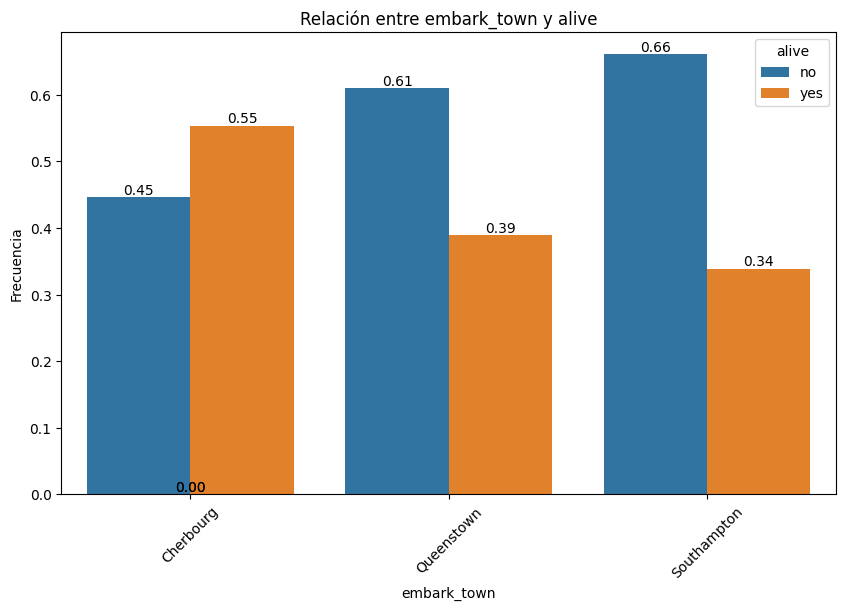

In [86]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True,relative_freq=True)

In [87]:
df_titanic.groupby('embark_town',as_index=False)['alive'].value_counts(normalize=True)

,embark_town,alive,proportion
0,Cherbourg,yes,0.553571
1,Cherbourg,no,0.446429
2,Queenstown,no,0.610390
3,Queenstown,yes,0.389610
4,Southampton,no,0.660991
5,Southampton,yes,0.339009


In [88]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* ATENCIÓN: Sobrevivieron más entre los que embarcaron en Southampton que los que lo hicieron en el resto de puertos!!!
* El test Chi-2 nos confirma que el puerto en el que embarcaron influyó en si sobrevivieron o no.
* ¿Puede que algunos puertos tengan mal de ojo?
* O puede ser que este sesgo (diferencia) venga motivado por otros factores, como que embarcaron más hombres en Southampton o más gente en tercera clase
* Lo comprobamos

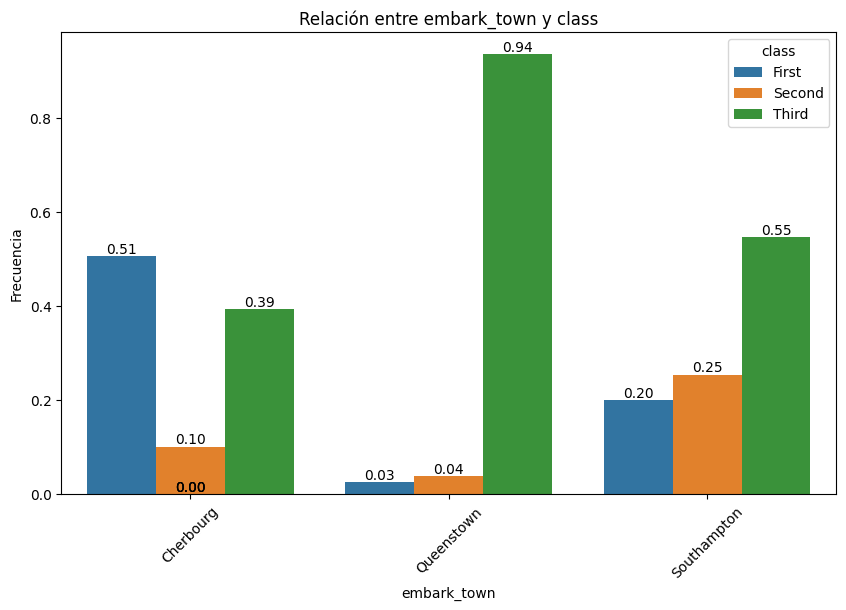

In [89]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", relative_freq= True, show_values= True)

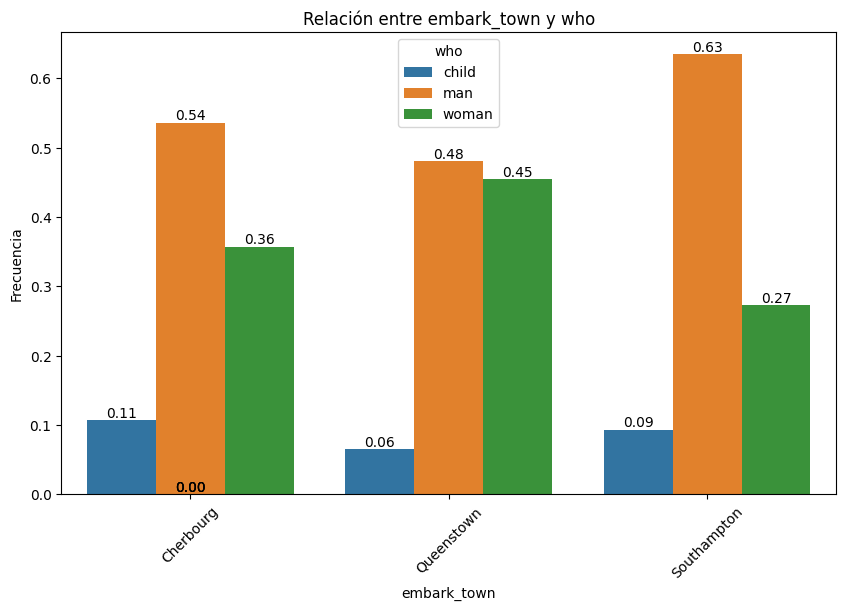

In [90]:
plot_categorical_relationship_fin(df_titanic, "embark_town","who", relative_freq= True, show_values= True)

* Viendo esas dos gráficas ànteriores parece explicarse todo.
* En Cherbourg la proporción de pasajeros de primera es mayor bastante mayor que en los otros dos puertos. 
* Y la diferencia entre los ratios de Queenstown y de Southampton podría explicarse por el ratio de mujeres que embarcaron en una y otra ciudad. 
* CONCLUSIÓN: más que magia en el origen, el ser mujer y la clase influye mucho como para enmascarar esta relación. 
* ¿Qué deberíamos hacer para hacerla desaparecer matemáticamente?*

* Fijamos los valores who y class y vemos si existe relación entre embark_town y alive.
* Si realmente no hay relación entre ellos salvo la debida a la clase del pasaje y al tipo de pasajero saldrá que son independientes para cada combinación

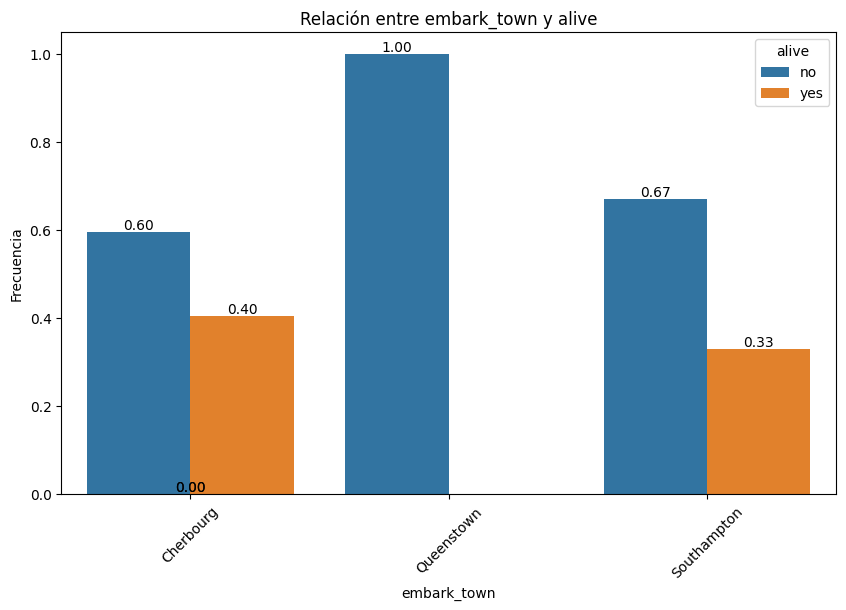

In [91]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)



In [92]:
tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1.2309087111718686
P-Value: 0.5403953078947801
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[27.17647059  0.64705882 49.17647059]
 [14.82352941  0.35294118 26.82352941]]


* Tanto la gráfica como el test Chi-2 nos hacen pensar que no existe relación de supervivencia con el puerto para hombres embarcados en primera

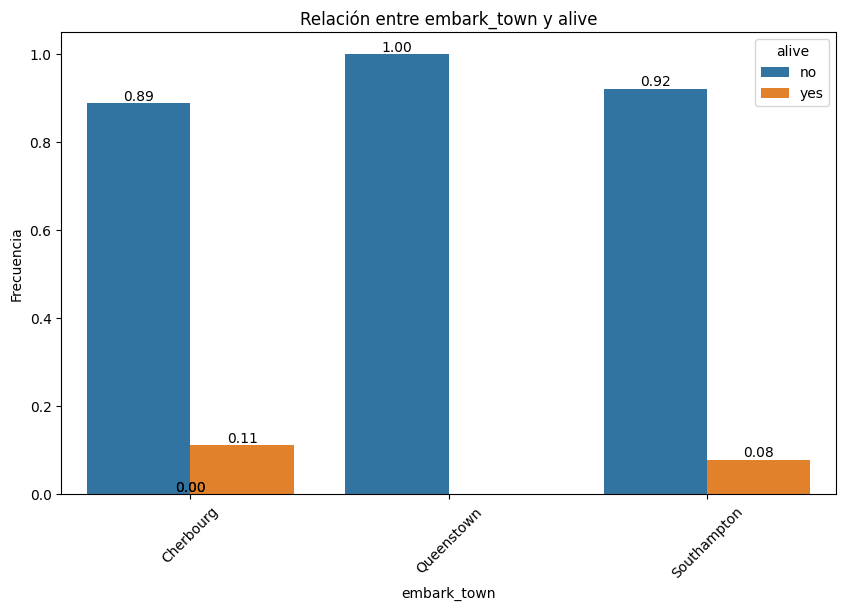

Valor Chi-Cuadrado: 0.20474749969131997
P-Value: 0.9026921075770808
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[8.27272727e+00 9.19191919e-01 8.18080808e+01]
 [7.27272727e-01 8.08080808e-02 7.19191919e+00]]


In [93]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* No se ve esa relación significativa entre supervivencia y puerto de embarque

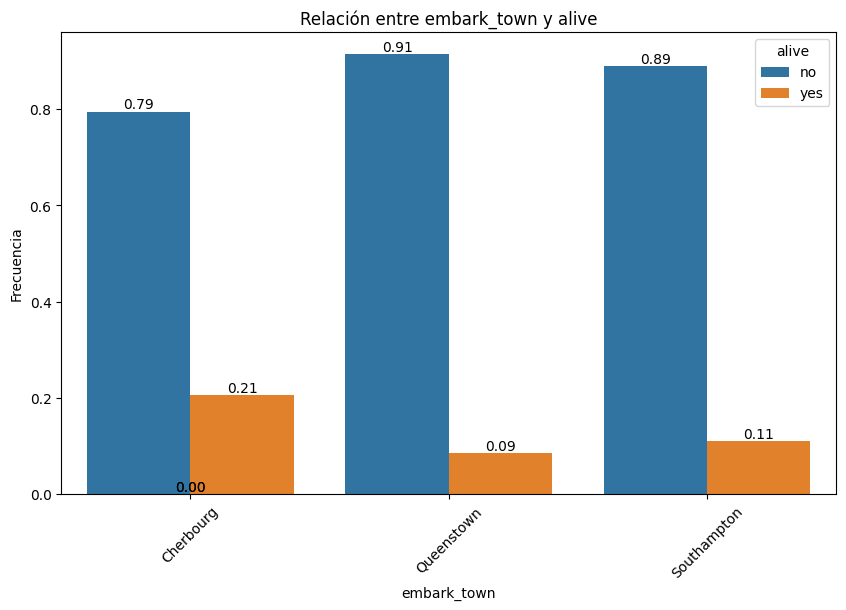

Valor Chi-Cuadrado: 3.3072128132305267
P-Value: 0.1913585459765817
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 34.35423197  30.830721   215.81504702]
 [  4.64576803   4.169279    29.18495298]]


In [94]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Aunque hay variaciones porcentuales entre Cherbourg y el resto de lugares de embarque no podemos decir que sean estadísticamente extrapolables con confianza estadística. 
* No podemos suponer una relación ente sobrevivir y el puerto de embarque en estas condiciones, 
* Sí que podríamos pensar que quizás merezca estudiar un poco más la posible relación. 

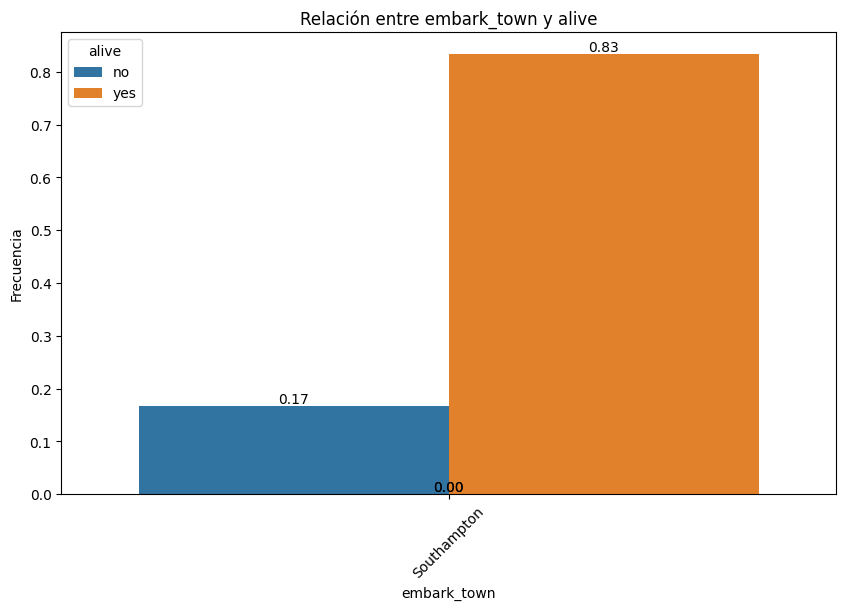

embark_town  Southampton
alive                   
no                     1
yes                    5
Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[1.]
 [5.]]


In [95]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

print(tabla_contingencia)

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Solo embarcaron niños (6) en primera en Southampton y además muy pocos para tener un valor estadístico extrapolabe. 
* No podemos decir nada sobre la dependencia de este grupo respecto al puerto.

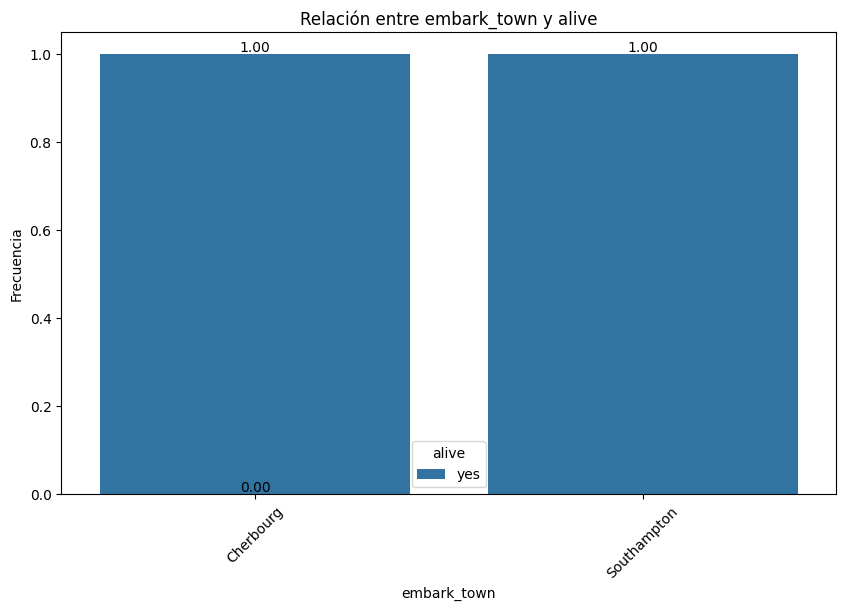

Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[ 3. 16.]]


In [96]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Sobrevivieron todos los niños que embarcaron en segunda independientemente de donde embarcaron
* Es cierto que la muestra es pequeña, pero de primeras refuerza la hipótesis de que no influyó el puerto de embarque para niños, ni para hombres. 

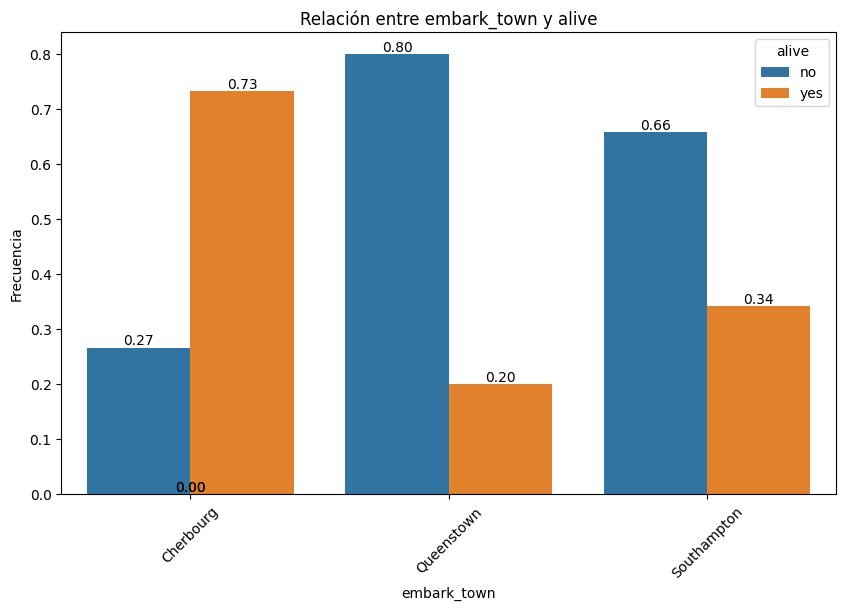

Valor Chi-Cuadrado: 7.903047315257843
P-Value: 0.019225386540995867
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8.53448276  2.84482759 21.62068966]
 [ 6.46551724  2.15517241 16.37931034]]


In [97]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* En tercera clase si hay depedencia
* De nuevo son muestras pequeñas, 
* Parece que sí hay una relación combinada entre la tercera clase y el puerto. 
* Por ahora la tercera clase que subía en Chersbourgh parece tener un porcentaje más alto de supervivencia que en el resto de puertos. 


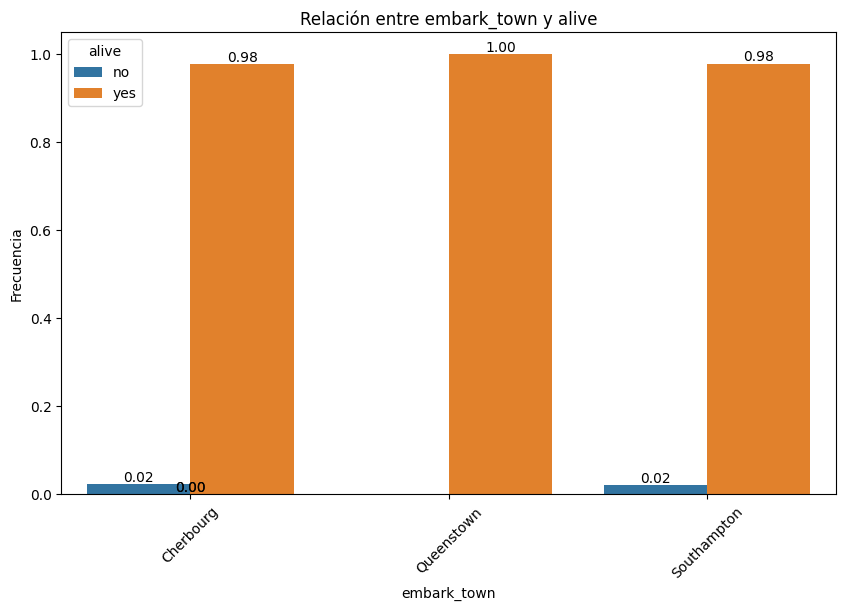

Valor Chi-Cuadrado: 0.02681395904797383
P-Value: 0.9866824937243175
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[9.45054945e-01 2.19780220e-02 1.03296703e+00]
 [4.20549451e+01 9.78021978e-01 4.59670330e+01]]


In [98]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Las mujeres que viajaban en primera independientemente del puerto se salvaron casi todas. No hay depedencia aquí con el puerto

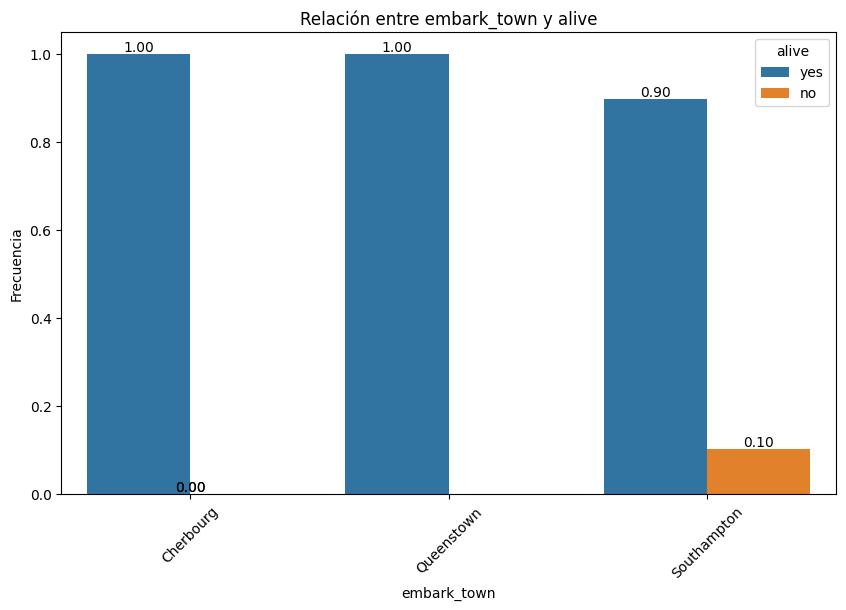

Valor Chi-Cuadrado: 0.7830508474576271
P-Value: 0.6760248632034247
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 0.45454545  0.18181818  5.36363636]
 [ 4.54545455  1.81818182 53.63636364]]


In [99]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Tampoco se puede decir que haya una relación significativa y extrapolable entre la supervivencia de las mujeres en segunda clase y el puerto de embarque

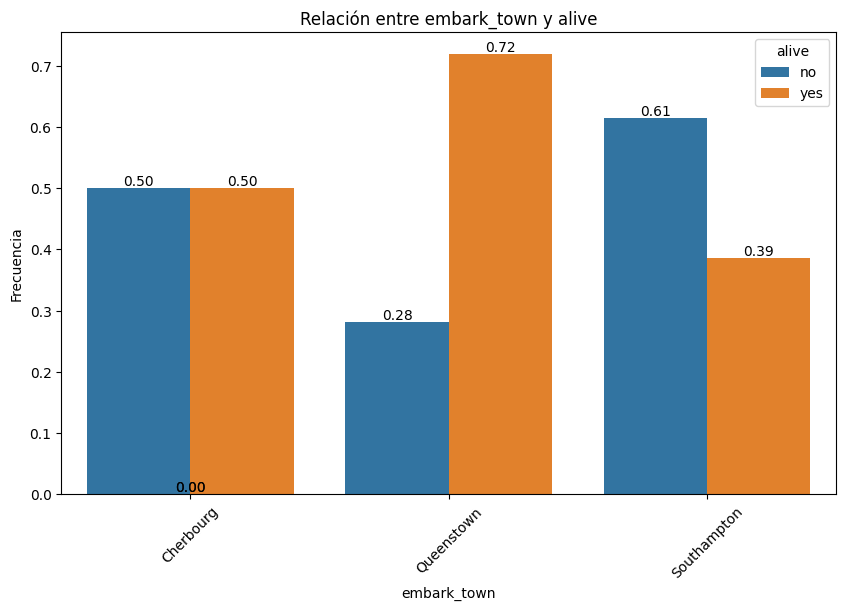

Valor Chi-Cuadrado: 9.750056078465867
P-Value: 0.007634880139676012
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 6.10526316 16.28070175 35.61403509]
 [ 5.89473684 15.71929825 34.38596491]]


In [100]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Aquí se observa dependecia estadística significativa entre el puerto de embarque y la supervivencia
* Las mujeres que subieron en Southampton en tercera lo tuvieron peor que las que lo hicieron en Cherbourg y las que los hicieron en Queenstown

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?



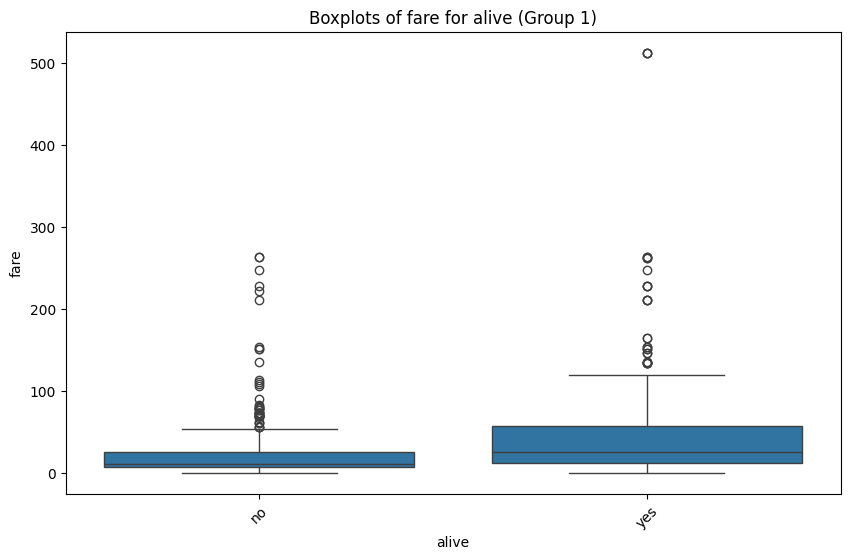

In [101]:
plot_grouped_boxplots(df_titanic,"alive","fare")

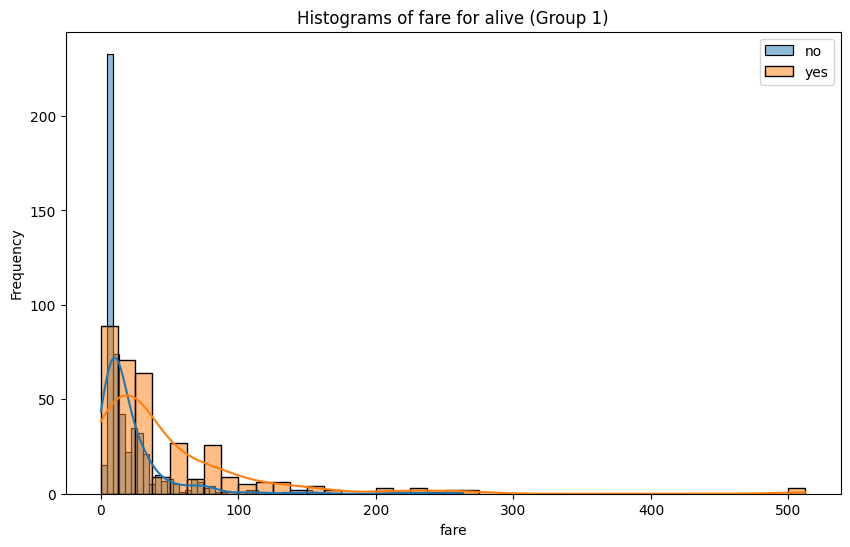

In [102]:
plot_grouped_histograms(df_titanic, "alive","fare", group_size = 2)

In [103]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


* Visualmente parece que si hay influencia
* El test U de Mann-Whitney nos dice que sí hay relación
* Seguramente está relacionado con la clase


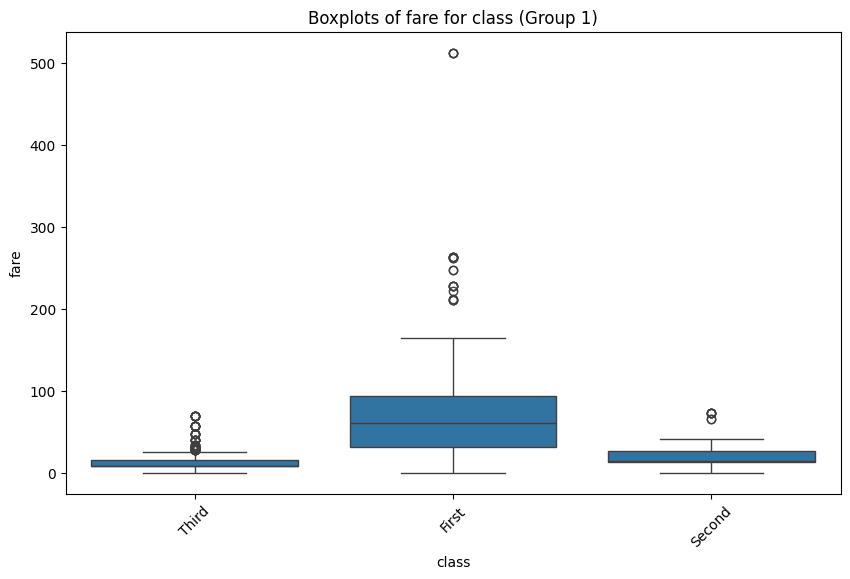

In [104]:
plot_grouped_boxplots(df_titanic,"class","fare")

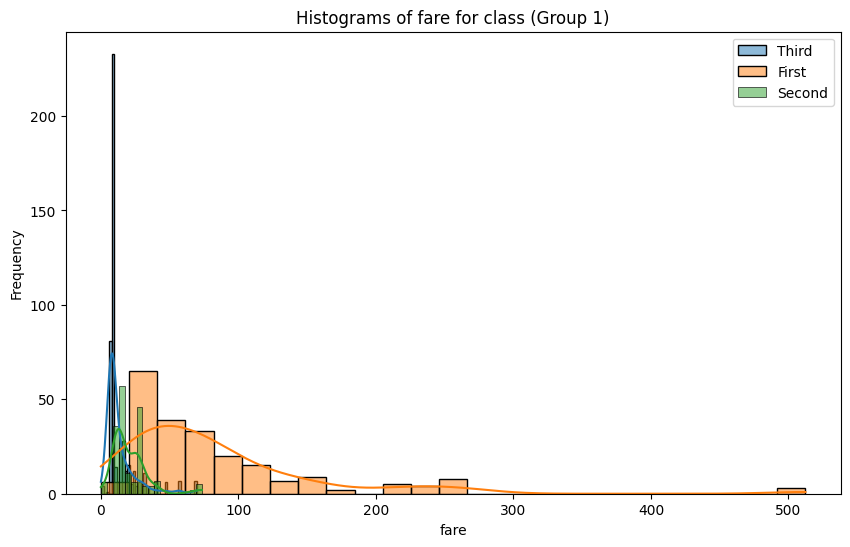

In [105]:
plot_grouped_histograms(df_titanic,"class","fare", group_size = 3)

* El histograma comparado de precios y clases, da que pensar en si se podría hacer un bin en fare
* Si existiese relevancia estadística con el fare (binned) podríamos decir que el precio es lo que salvó, independientemente de la clase
* Por ejemplo, así: no era la clase sino el precio el que te daba mejor cabina

In [106]:
df_alive = df_titanic.loc[df_titanic.alive == "yes"].copy()
df_dead = df_titanic.loc[df_titanic.alive == "no"].copy()

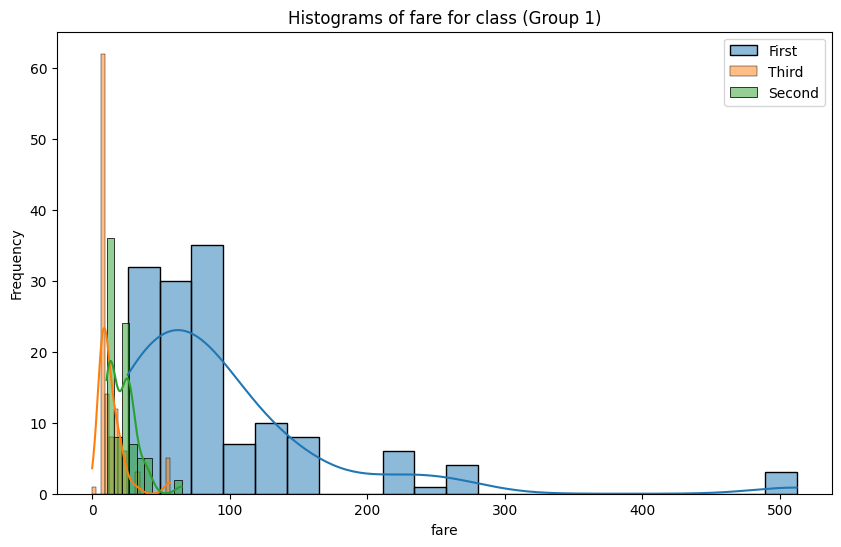

In [107]:
plot_grouped_histograms(df_alive,"class","fare", group_size = 3)

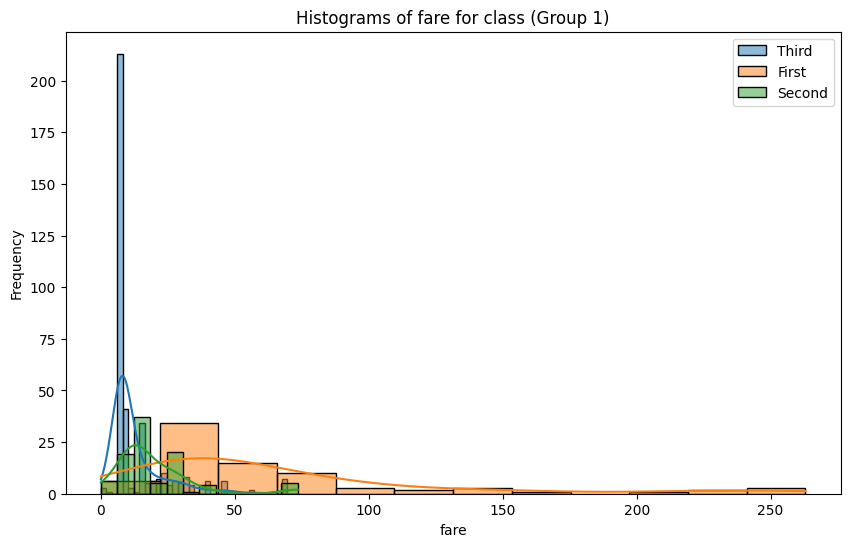

In [108]:
plot_grouped_histograms(df_dead,"class","fare", group_size = 3)

* CONCLUSIONES: El precio influyó en la supervivencia. 